In [1]:
import pandas as pd
import numpy as np

import featuretools as ft
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import os

In [2]:
flight_weather = pd.read_csv('./flight_weather.csv').reset_index()
flight_weather = flight_weather.drop('Unnamed: 0', axis=1)
flight_weather = flight_weather.drop_duplicates()
flight_weather.shape

(36407, 98)

In [3]:
flight_weather.columns

Index(['index', 'flight_date', 'flight_status', 'departure_airport',
       'departure_timezone', 'departure_iata', 'departure_icao',
       'departure_gate', 'departure_delay', 'departure_scheduled',
       'departure_estimated', 'departure_actual', 'departure_estimated_runway',
       'departure_actual_runway', 'arrival_airport', 'arrival_timezone',
       'arrival_iata', 'arrival_icao', 'arrival_terminal', 'arrival_scheduled',
       'arrival_estimated', 'arrival_actual', 'arrival_estimated_runway',
       'arrival_actual_runway', 'airline_name', 'airline_iata', 'airline_icao',
       'flight_number', 'flight_iata', 'flight_icao', 'rh_departure',
       'max_wind_spd_ts_departure', 't_ghi_departure',
       'max_wind_spd_departure', 'solar_rad_departure',
       'wind_gust_spd_departure', 'max_temp_ts_departure',
       'min_temp_ts_departure', 'clouds_departure', 'max_dni_departure',
       'precip_gpm_departure', 'wind_spd_departure', 'slp_departure',
       'ts_departure', 'max_g

In [4]:
len(flight_weather.columns)

98

In [5]:
flight_weather['departure_delay']

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
36402    15.0
36403    17.0
36404    17.0
36405    36.0
36406    36.0
Name: departure_delay, Length: 36407, dtype: float64

In [6]:
flight_weather[flight_weather['departure_delay'] > 15]

,index,flight_date,flight_status,departure_airport,departure_timezone,departure_iata,departure_icao,departure_gate,departure_delay,departure_scheduled,...,ghi_arrival,max_temp_arrival,t_dni_arrival,max_uv_arrival,t_dhi_arrival,datetime_arrival,t_solar_rad_arrival,min_temp_arrival,max_wind_dir_arrival,snow_depth_arrival
8,8,2021-12-06,landed,Frankfurt International Airport,Europe/Berlin,FRA,EDDF,A56,17.0,2021-12-06 21:40:00+00:00,...,55.6,2.0,4093.2,0.5,459.1,2021-12-06,276.6,-1.0,166.0,NaN
9,9,2021-12-06,landed,Frankfurt International Airport,Europe/Berlin,FRA,EDDF,B58,67.0,2021-12-06 12:25:00+00:00,...,221.1,31.2,7947.5,6.6,977.0,2021-12-06,5289.5,23.0,92.0,NaN
10,10,2021-12-06,landed,Frankfurt International Airport,Europe/Berlin,FRA,EDDF,Z22,30.0,2021-12-06 12:50:00+00:00,...,117.7,12.8,5947.0,0.9,694.1,2021-12-06,346.7,10.0,175.0,NaN
11,11,2021-12-06,landed,Frankfurt International Airport,Europe/Berlin,FRA,EDDF,Z22,30.0,2021-12-06 12:50:00+00:00,...,117.7,12.8,5947.0,0.9,694.1,2021-12-06,346.7,10.0,175.0,NaN
12,12,2021-12-06,landed,Frankfurt International Airport,Europe/Berlin,FRA,EDDF,Z22,30.0,2021-12-06 12:50:00+00:00,...,117.7,12.8,5947.0,0.9,694.1,2021-12-06,346.7,10.0,175.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36399,36399,2022-02-28,landed,Ronald Reagan Washington National Airport,America/New_York,DCA,KDCA,42,19.0,2022-02-28 12:56:00+00:00,...,227.1,18.9,8220.1,2.6,1001.8,2022-02-28,2687.0,-2.8,201.0,0.0
36403,36403,2022-02-28,landed,Zurich,Europe/Zurich,ZRH,LSZH,1,17.0,2022-02-28 17:30:00+00:00,...,87.8,3.0,5429.9,1.9,630.8,2022-02-28,2107.1,-2.0,224.0,NaN
36404,36404,2022-02-28,landed,Zurich,Europe/Zurich,ZRH,LSZH,1,17.0,2022-02-28 17:30:00+00:00,...,87.8,3.0,5429.9,1.9,630.8,2022-02-28,2107.1,-2.0,224.0,NaN
36405,36405,2022-02-28,landed,Ramon Villeda Morales International,America/Tegucigalpa,SAP,MHLM,NaN,36.0,2022-02-28 12:00:00+00:00,...,286.6,24.0,9193.5,9.7,1055.0,2022-02-28,6870.7,5.0,117.0,NaN


In [7]:
# len(flight_weather['airline_name'].unique())
num_flights = flight_weather.groupby(by=["departure_iata", "arrival_iata"]).count()['flight_number']
num_flights = num_flights.sort_values(ascending=False)
num_flights.head(10)

departure_iata  arrival_iata
DFW             ABI             342
ATL             FAY             304
ACT             DFW             304
ATL             MLU             304
DFW             ACT             304
ABI             DFW             228
ATL             BOS             196
DFW             FAY             190
FAY             ATL             190
CGK             DPS             172
Name: flight_number, dtype: int64

In [8]:
# airlines = flight_weather['airline_name'].value_counts()

In [9]:
# airline_freq = {k:v for k,v in airlines.items() if v > 100}

In [10]:
# print(airline_freq)
# print(len(airline_freq))

In [11]:
# airports = flight_weather['departure_iata'].value_counts()

In [12]:
# airports

In [13]:
# airport_freq = {k:v for k,v in airports.items() if v > 100}

In [14]:
# airport_freq

In [15]:
import matplotlib.pyplot as plt

df = flight_weather['flight_status'].value_counts()
y = df.values

plt.figure(figsize=(16, 8))
plt.pie(y,
        labels=df.keys().to_list(),
        colors=["#d5695d", "#5d8ca8", "#65a479", "#a564c9", "#65a490", "yellow"], 
        explode=(0.2, 0, 0, 0, 0, 0), 
        autopct='%.2f%%', 
       )
plt.show()

<Figure size 1600x800 with 1 Axes>

In [16]:
# feature_tools selection

def load_entityset(flight_weather):
    # return the EntitySet object
    dataframes = {
    "flight_weather" : (flight_weather, 'index')
    }
    
    relationships = []

    return ft.EntitySet("my-entity-set", dataframes, relationships)

In [17]:
es = load_entityset(flight_weather)
# use ft.dfs to perform feature engineering
feature_matrix, feature_defs = ft.dfs(entityset=es, entities=es, target_entity="flight_weather")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning: Only one entity in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one entity in entityset, changing max_depth to "


In [18]:
feature_matrix

,flight_status,departure_airport,departure_timezone,departure_iata,departure_icao,departure_gate,departure_delay,arrival_airport,arrival_timezone,arrival_iata,...,YEAR(arrival_estimated_runway),YEAR(arrival_scheduled),YEAR(datetime_arrival),YEAR(datetime_departure),YEAR(departure_actual),YEAR(departure_actual_runway),YEAR(departure_estimated),YEAR(departure_estimated_runway),YEAR(departure_scheduled),YEAR(flight_date)
index,,,,,,,,,,,,,,,,,,,,,
0,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,Findel,Europe/Luxembourg,LUX,...,2021.0,2021,2021,2021,2021.0,2021.0,2021,2021.0,2021,2021
1,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,Findel,Europe/Luxembourg,LUX,...,2021.0,2021,2021,2021,2021.0,2021.0,2021,2021.0,2021,2021
2,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,Findel,Europe/Luxembourg,LUX,...,2021.0,2021,2021,2021,2021.0,2021.0,2021,2021.0,2021,2021
3,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,Findel,Europe/Luxembourg,LUX,...,2021.0,2021,2021,2021,2021.0,2021.0,2021,2021.0,2021,2021
4,landed,Schiphol,Europe/Amsterdam,AMS,EHAM,B15,10.0,Findel,Europe/Luxembourg,LUX,...,2021.0,2021,2021,2021,2021.0,2021.0,2021,2021.0,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36402,landed,Zurich,Europe/Zurich,ZRH,LSZH,A83,15.0,Franz Josef Strauss,Europe/Berlin,MUC,...,2022.0,2022,2022,2022,2022.0,2022.0,2022,2022.0,2022,2022
36403,landed,Zurich,Europe/Zurich,ZRH,LSZH,1,17.0,Arlanda,Europe/Stockholm,ARN,...,2022.0,2022,2022,2022,2022.0,2022.0,2022,2022.0,2022,2022
36404,landed,Zurich,Europe/Zurich,ZRH,LSZH,1,17.0,Arlanda,Europe/Stockholm,ARN,...,2022.0,2022,2022,2022,2022.0,2022.0,2022,2022.0,2022,2022


In [19]:
for i in feature_matrix.columns:
    print(i)

flight_status
departure_airport
departure_timezone
departure_iata
departure_icao
departure_gate
departure_delay
arrival_airport
arrival_timezone
arrival_iata
arrival_icao
arrival_terminal
airline_name
airline_iata
airline_icao
flight_number
flight_iata
flight_icao
rh_departure
max_wind_spd_ts_departure
t_ghi_departure
max_wind_spd_departure
solar_rad_departure
wind_gust_spd_departure
max_temp_ts_departure
min_temp_ts_departure
clouds_departure
max_dni_departure
precip_gpm_departure
wind_spd_departure
slp_departure
ts_departure
max_ghi_departure
temp_departure
pres_departure
dni_departure
dewpt_departure
snow_departure
dhi_departure
precip_departure
wind_dir_departure
max_dhi_departure
ghi_departure
max_temp_departure
t_dni_departure
max_uv_departure
t_dhi_departure
t_solar_rad_departure
min_temp_departure
max_wind_dir_departure
snow_depth_departure
rh_arrival
max_wind_spd_ts_arrival
t_ghi_arrival
max_wind_spd_arrival
solar_rad_arrival
wind_gust_spd_arrival
max_temp_ts_arrival
min_temp_

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

feature_matrix_temp = feature_matrix.copy()
feature_matrix_temp = pd.DataFrame(feature_matrix_temp)
feature_matrix_temp = feature_matrix_temp.dropna(how='any', axis = 0)

for i in feature_matrix_temp.columns:
    if feature_matrix_temp[i].dtype == 'object':
        # feature_matrix_temp = feature_matrix_temp.drop(i, axis=1)
        encoder = LabelEncoder()
        feature_matrix_temp[i] = encoder.fit_transform(feature_matrix_temp[i])
    
    
feature_matrix_temp = feature_matrix_temp.fillna(0)
feature_matrix_temp.shape
y = feature_matrix_temp['flight_status']
X = feature_matrix_temp.drop(['flight_status'], axis=1)

sel = VarianceThreshold(threshold=(.6 * (1 - .6)))
feature_matrix_temp = sel.fit_transform(feature_matrix_temp)
#apply SelectKBest class to extract top 10 best features 
selector = SelectKBest(score_func=f_regression, k=10)
fit = selector.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Feature', 'Score']
featureScores = featureScores.sort_values(['Score'], axis = 0, ascending = False)
X = X.loc[:, featureScores['Feature'][:10].tolist()]
print(featureScores.nlargest(10,'Score'))
print(X.shape)

                                 Feature      Score
8                           arrival_iata  25.325424
9                           arrival_icao  25.322576
111           WEEKDAY(arrival_estimated)  22.004385
113           WEEKDAY(arrival_scheduled)  22.004385
116            WEEKDAY(departure_actual)  21.924415
117     WEEKDAY(departure_actual_runway)  21.924415
119  WEEKDAY(departure_estimated_runway)  21.924415
118         WEEKDAY(departure_estimated)  21.868802
120         WEEKDAY(departure_scheduled)  21.868802
114            WEEKDAY(datetime_arrival)  21.868802
(3179, 10)


In [21]:
feature_list = featureScores['Feature'][:20].tolist()
feature_list.append('flight_status')
print(feature_list)

['arrival_iata', 'arrival_icao', 'WEEKDAY(arrival_estimated)', 'WEEKDAY(arrival_scheduled)', 'WEEKDAY(departure_actual)', 'WEEKDAY(departure_actual_runway)', 'WEEKDAY(departure_estimated_runway)', 'WEEKDAY(departure_estimated)', 'WEEKDAY(departure_scheduled)', 'WEEKDAY(datetime_arrival)', 'WEEKDAY(datetime_departure)', 'WEEKDAY(flight_date)', 'WEEKDAY(arrival_estimated_runway)', 'WEEKDAY(arrival_actual_runway)', 'WEEKDAY(arrival_actual)', 'arrival_timezone', 'rh_departure', 'temp_arrival', 'clouds_departure', 'min_temp_arrival', 'flight_status']


In [22]:
df = feature_matrix[feature_list]
df.columns

Index(['arrival_iata', 'arrival_icao', 'WEEKDAY(arrival_estimated)',
       'WEEKDAY(arrival_scheduled)', 'WEEKDAY(departure_actual)',
       'WEEKDAY(departure_actual_runway)',
       'WEEKDAY(departure_estimated_runway)', 'WEEKDAY(departure_estimated)',
       'WEEKDAY(departure_scheduled)', 'WEEKDAY(datetime_arrival)',
       'WEEKDAY(datetime_departure)', 'WEEKDAY(flight_date)',
       'WEEKDAY(arrival_estimated_runway)', 'WEEKDAY(arrival_actual_runway)',
       'WEEKDAY(arrival_actual)', 'arrival_timezone', 'rh_departure',
       'temp_arrival', 'clouds_departure', 'min_temp_arrival',
       'flight_status'],
      dtype='object')

In [23]:
df.isnull().sum()

arrival_iata                               0
arrival_icao                               0
WEEKDAY(arrival_estimated)                 0
WEEKDAY(arrival_scheduled)                 0
WEEKDAY(departure_actual)               6134
WEEKDAY(departure_actual_runway)        6134
WEEKDAY(departure_estimated_runway)     6134
WEEKDAY(departure_estimated)               0
WEEKDAY(departure_scheduled)               0
WEEKDAY(datetime_arrival)                  0
WEEKDAY(datetime_departure)                0
WEEKDAY(flight_date)                       0
WEEKDAY(arrival_estimated_runway)      10873
WEEKDAY(arrival_actual_runway)         10873
WEEKDAY(arrival_actual)                10873
arrival_timezone                           0
rh_departure                               0
temp_arrival                               0
clouds_departure                           0
min_temp_arrival                           0
flight_status                             57
dtype: int64

In [24]:
df = df.fillna(method='backfill', axis=0, inplace=False)

In [25]:
df.isnull().sum()

arrival_iata                           0
arrival_icao                           0
WEEKDAY(arrival_estimated)             0
WEEKDAY(arrival_scheduled)             0
WEEKDAY(departure_actual)              0
WEEKDAY(departure_actual_runway)       0
WEEKDAY(departure_estimated_runway)    0
WEEKDAY(departure_estimated)           0
WEEKDAY(departure_scheduled)           0
WEEKDAY(datetime_arrival)              0
WEEKDAY(datetime_departure)            0
WEEKDAY(flight_date)                   0
WEEKDAY(arrival_estimated_runway)      0
WEEKDAY(arrival_actual_runway)         0
WEEKDAY(arrival_actual)                0
arrival_timezone                       0
rh_departure                           0
temp_arrival                           0
clouds_departure                       0
min_temp_arrival                       0
flight_status                          0
dtype: int64

# Model to predict flight status

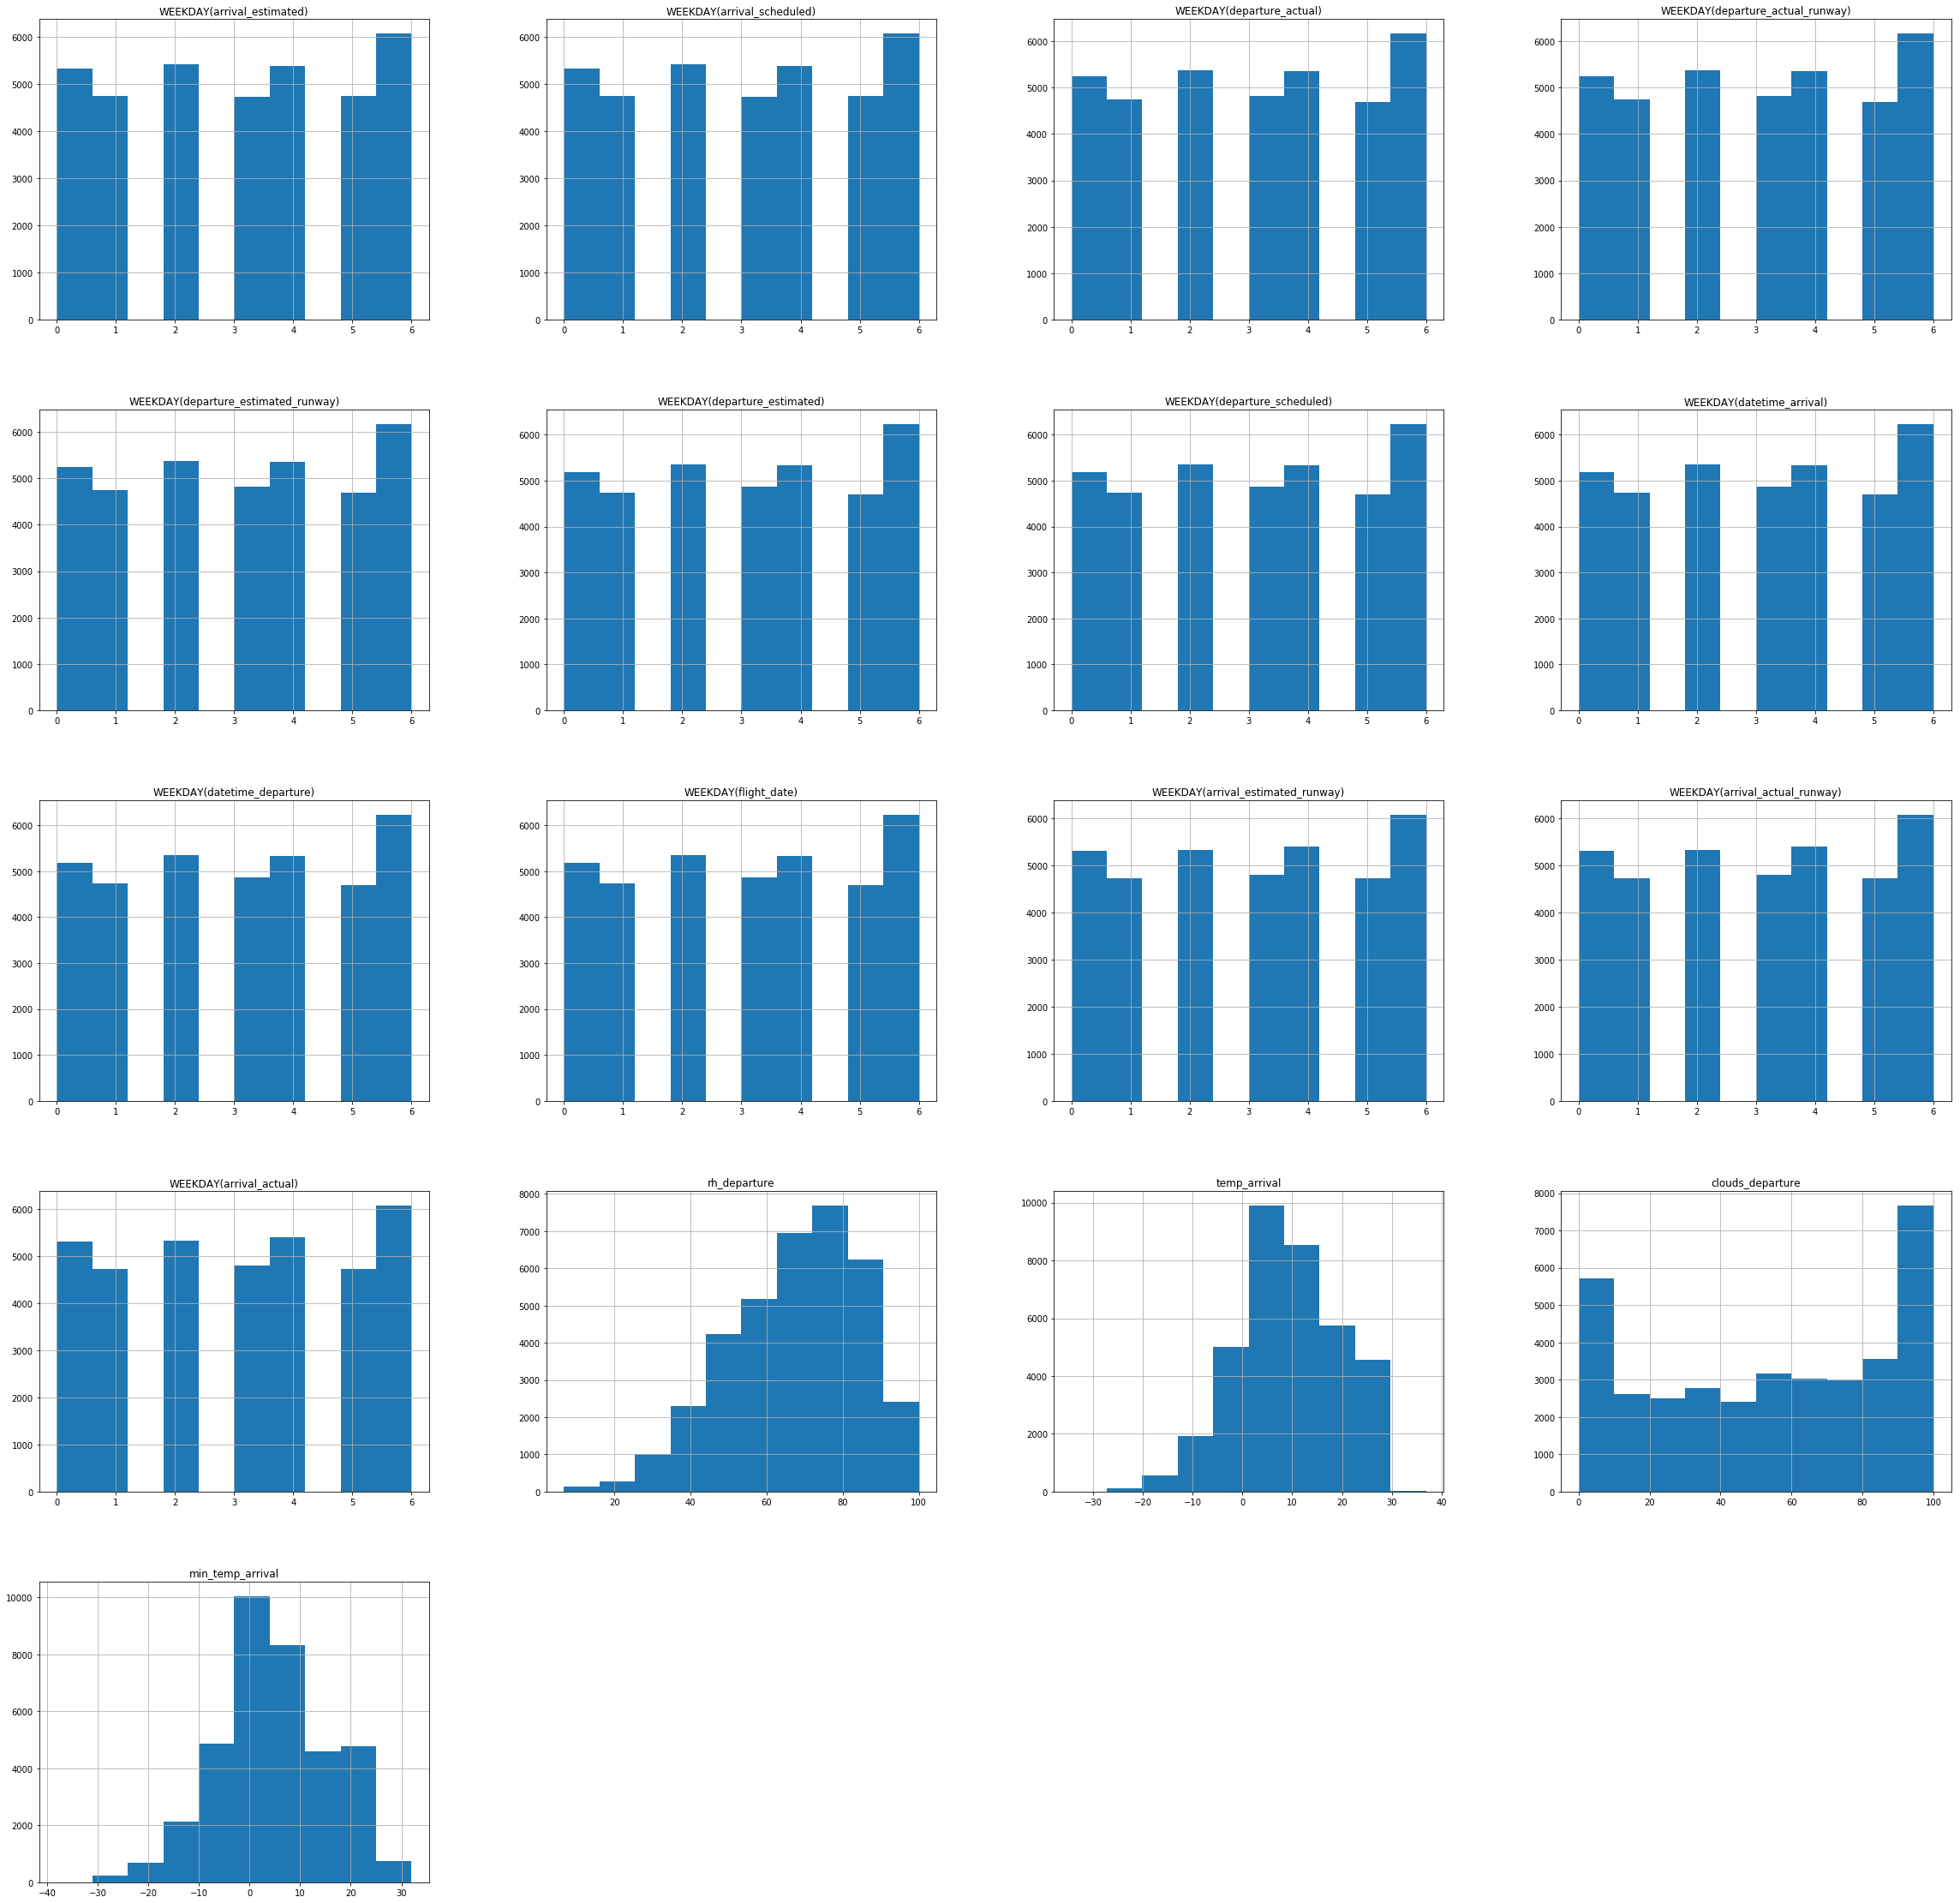

In [26]:
df.hist(figsize=(40,40));

In [27]:
# encoder flight_status from 0 - 5
df['status_label'] = df['flight_status']\
    .map(lambda x: 0 if x=="landed" else 1 if x=="scheduled" else 2 if x=="active" else 3 if x=="cancelled" else 4 if x =="diverted" else 5)
len(df['status_label'].unique())


6

In [28]:
df['arrival_iata'].value_counts()

ATL    2064
DFW    2048
ORD    1116
BOS    1012
AMS     924
       ... 
RDZ       1
MAJ       1
RKE       1
BGD       1
PMB       1
Name: arrival_iata, Length: 630, dtype: int64

In [29]:
df = df.drop(['arrival_timezone', 'arrival_iata', 'arrival_icao'], axis = 1)
df.columns

Index(['WEEKDAY(arrival_estimated)', 'WEEKDAY(arrival_scheduled)',
       'WEEKDAY(departure_actual)', 'WEEKDAY(departure_actual_runway)',
       'WEEKDAY(departure_estimated_runway)', 'WEEKDAY(departure_estimated)',
       'WEEKDAY(departure_scheduled)', 'WEEKDAY(datetime_arrival)',
       'WEEKDAY(datetime_departure)', 'WEEKDAY(flight_date)',
       'WEEKDAY(arrival_estimated_runway)', 'WEEKDAY(arrival_actual_runway)',
       'WEEKDAY(arrival_actual)', 'rh_departure', 'temp_arrival',
       'clouds_departure', 'min_temp_arrival', 'flight_status',
       'status_label'],
      dtype='object')

In [30]:
len(df.columns)

19

In [31]:
# six flight status
df_list = []
status = df['flight_status'].unique()
for i in status:
    new_df = pd.DataFrame()
    new_df = df[df['flight_status'] == i]
    df_list.append(new_df)

In [32]:
# Split train / test dataset based on fixed fac for all six labels
test = pd.DataFrame()             
train = pd.DataFrame()            

for i in df_list:
    sample = i.sample(int(0.2*len(i)))
    sample_index = sample.index
    
    all_index = i.index
    residue_index = all_index.difference(sample_index)
    residue = i.loc[residue_index]

    test = pd.concat([test, sample], ignore_index=True)
    train = pd.concat([train, residue], ignore_index=True)
if 'flight_status' in train.columns:
    train = train.drop('flight_status', axis=1)
if 'flight_status' in test.columns: 
    test = test.drop('flight_status', axis=1)

In [33]:
accuracy_score = {}
# LogisticModel performance
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]
test_X = test.iloc[:, :-1]
test_y = test.iloc[:, -1]


lr.fit(train_X, train_y)
pred_y = lr.predict(test_X)

print("accuracy: ", metrics.accuracy_score(test_y, pred_y))
accuracy_score['logistic'] = metrics.accuracy_score(test_y, pred_y)

accuracy:  0.6984061555372355


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


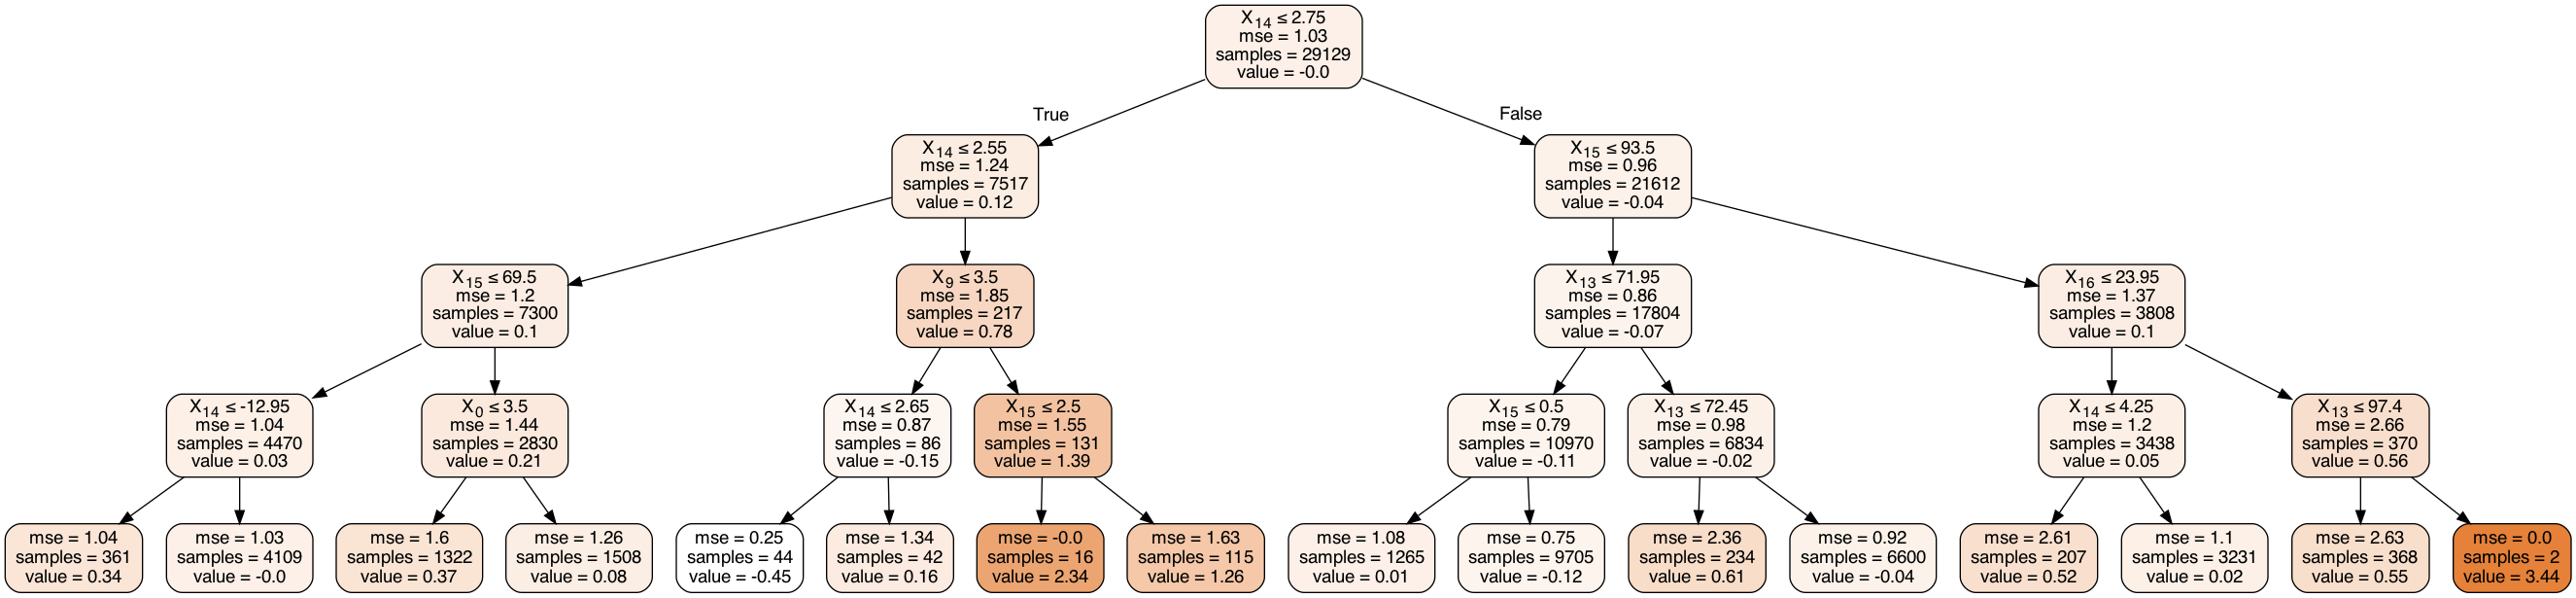

In [34]:
# GBDT Model
import pydotplus
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz


gbdt = GradientBoostingRegressor(max_depth=4, criterion ='mse').fit(train_X, train_y)
sub_tree = gbdt.estimators_[5, 0]
dot_data = export_graphviz(sub_tree, out_file=None, filled=True, rounded=True, special_characters=True, precision=2)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [35]:
# GBDT Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(train_X,train_y)
y_pred = gbm0.predict(test_X)
y_predprob = gbm0.predict_proba(test_X)[:,1]

print("Accuracy : %.4g" % metrics.accuracy_score(test_y.values, y_pred))
accuracy_score['GBDT'] = metrics.accuracy_score(test_y.values, y_pred)

Accuracy : 0.724


In [36]:
# XGBoost
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=2, 
                     learning_rate=1, 
                     n_estimators=2, # number of iterations or number of trees
                     slient=0,
                     objective="binary:logistic"
                    )

xgbc.fit(train_X, train_y)
pred_train = xgbc.predict(train_X)
pred_train = [round(x) for x in pred_train]
train_score = metrics.accuracy_score(train_y, pred_train)
print("Train Accuracy: %.2f%%" % (train_score * 100))

pred_test = xgbc.predict(test_X)
pred_test = [1 if x >= 0.5 else 0 for x in pred_test]
print("Test Accuracy: %.2f%%" % (metrics.accuracy_score(test_y, pred_test)))
accuracy_score['XGBoost'] = metrics.accuracy_score(test_y, pred_test)

[17:09:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:09:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy: 70.25%
Test Accuracy: 0.70%


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [37]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import svm

tscv = TimeSeriesSplit(n_splits=10)
clf_rf = RandomForestClassifier(n_estimators=800, n_jobs=-1)
clf_rf_scores = cross_val_score(estimator=clf_rf, X=train_X, y=train_y, cv=tscv, verbose=True)
clf_rf.fit(train_X, train_y)
clf_rf_pred = clf_rf.predict(test_X)


clf_svm = svm.SVC(C=2,kernel='rbf',gamma=10, decision_function_shape='ovr') 
clf_svm_scores = cross_val_score(estimator=clf_svm, X=train_X, y=train_y, cv=tscv, verbose=True)
print(clf_rf_scores.mean(), clf_svm_scores.mean())
print("RandomForestClassifier AUC %.2f" % metrics.accuracy_score(test_y, clf_rf_pred))
accuracy_score['RandomForest'] = metrics.accuracy_score(test_y, clf_rf_pred)
# print("SVM AUC %.2f" % (clf_svm_scores.mean()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py", line 55

0.6709969788519639 nan
RandomForestClassifier AUC 0.88


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.2min finished


In [38]:
# Accuracy plot

In [39]:
df = df.drop('flight_status', axis = 1)

In [40]:
# # Use time series to perfrom train / test dataset
# from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(n_splits = 20)
# score_list = []



# for train_index, test_index in tscv.split(df):
#     clf = RandomForestClassifier(n_estimators=1000, random_state=80)
#     train = df.iloc[train_index[0] : train_index[-1], :]
#     test = df.iloc[test_index[0] : test_index[-1], :]
    
#     train_X = train.iloc[:, :-1]
#     train_y = train.iloc[:, -1]
#     test_X = test.iloc[:, :-1]
#     test_y = test.iloc[:, -1]

    
#     clf.fit(train_X, train_y)
#     scores = clf.score(test_X, test_y)
#     print("clf score: ", scores)
# # Find best n_estimators range
# #     score_lt = []
# #     for i in range(400,600,10):
# #         rfc = RandomForestClassifier(n_estimators=i+1
# #                                     ,random_state=90)
# #         score = cross_val_score(rfc, train_X, train_y, cv=10).mean()
# #         score_lt.append(score)
# #     score_max = max(score_lt)
# #     print('最大得分：{}'.format(score_max),
# #           '子树数量为：{}'.format(score_lt.index(score_max)*10+1))


# #     x = np.arange(1,201,10)
# #     plt.subplot(111)
# #     plt.plot(x, score_lt, 'r-')
# #     plt.show()

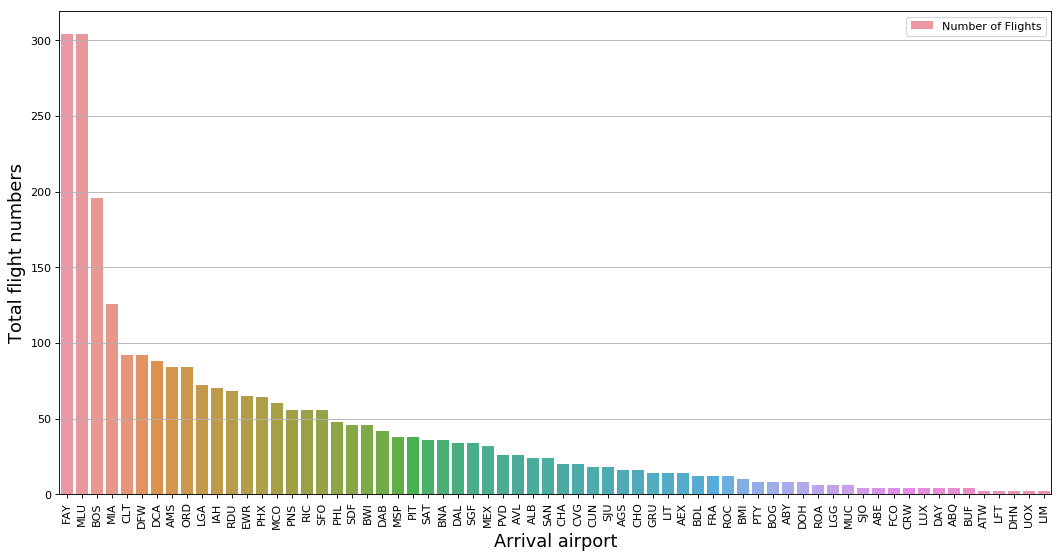

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


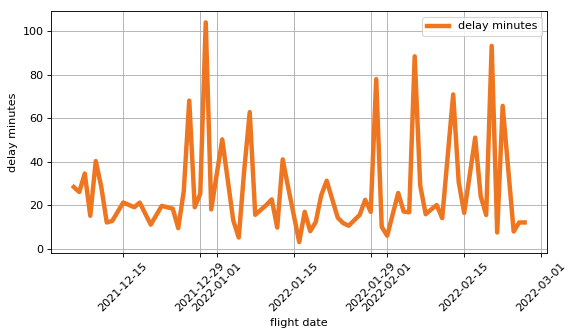

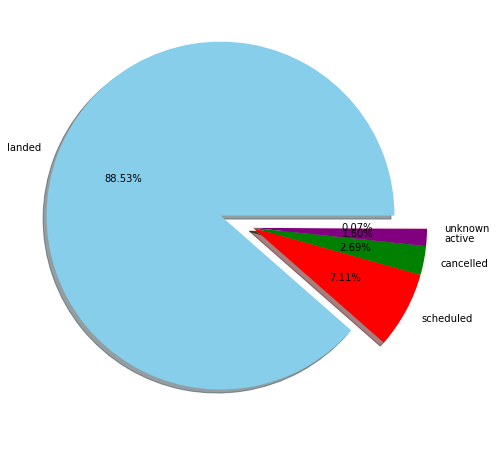

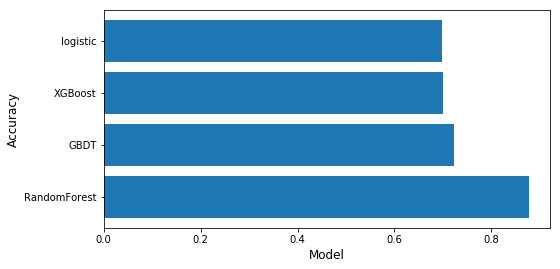

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# WEB Funtion
def draw_from_dict(dicdata, RANGE, heng=0):
    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    x = []
    y = []
    plt.figure(figsize=(16, 8), dpi=80)
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    plt.grid()
    plt.ylabel('Total flight numbers', size=16)
    plt.xlabel('Arrival airport', size=16)
    plt.xticks(rotation = 90)
    # plt.bar(x[0:RANGE], y[0:RANGE])
    sns.barplot(x=x[0:RANGE], y=y[0:RANGE], label='Number of Flights')
    plt.legend()
    plt.show()


def airport_statistics(airport, start_date, end_date):
    # Get airport data
    airport_data = flight_weather[flight_weather['departure_iata'] == airport]
    
    # Get data from assigned date
    start_index = airport_data[airport_data['flight_date'] == start_date].index.tolist()[0] 
    end_index = airport_data[airport_data['flight_date'] == end_date].index.tolist()[0] 
    airport_date = airport_data.loc[start_index : end_index, :]
    
    # Draw departure_arrival statics
    arrival_airport = airport_date['arrival_iata'].value_counts().to_dict()
    draw_from_dict(arrival_airport, len(arrival_airport))

    # Delay minutes
    delay_minutes = airport_date.groupby('flight_date').mean()['departure_delay']
    delay_data = airport_date['flight_date'].unique()
    plt.figure(figsize=(8, 4),  dpi=80)
    plt.xlabel('flight date')
    plt.ylabel('delay minutes')
    plt.xticks(rotation = 45)
    plt.plot(delay_data, delay_minutes, linewidth=4, color = '#EE7621', label='delay minutes')
    plt.legend()
    plt.grid()
    plt.show()
    
    df = airport_date['flight_status'].value_counts()
    y = df.values
    plt.figure(figsize=(16, 8))
    explode = []
    if len(df.keys()) == 5:
        explode = [0.2, 0, 0, 0, 0]
    else:
        explode = [0.2, 0, 0, 0, 0, 0]
    plt.pie(y,
            labels=df.keys().to_list(),
            colors=["skyblue", "red", "green", "purple", "pink", "yellow"], 
            shadow = True,
            explode= explode,
            autopct='%.2f%%', 
           )
    plt.show()
    
    by_value = sorted(accuracy_score.items(),key = lambda item:item[1],reverse=True)
    x = []
    y = []
    plt.figure(figsize=(8, 4))
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    
    plt.ylabel('Accuracy', size=12)
    plt.xlabel('Model', size=12)
    plt.xticks()
    plt.barh(x[0:len(accuracy_score)], y[0:len(accuracy_score)])
    plt.show()
    

    
    pass
    # return airport_date

airport_statistics('ATL', '2021-12-06', '2022-02-26')

In [42]:
# def airport_classfication():

#     flight_weather = pd.read_csv('./flight_weather.csv').reset_index()
#     flight_weather = flight_weather.drop('Unnamed: 0', axis=1)
#     flight_weather = flight_weather.drop_duplicates()
#     def load_entityset(flight_weather):
#         # return the EntitySet object
#         dataframes = {
#         "flight_weather" : (flight_weather, 'index')
#         }

#         relationships = []

#         return ft.EntitySet("my-entity-set", dataframes, relationships)

#     es = load_entityset(flight_weather)
#     # use ft.dfs to perform feature engineering
#     feature_matrix, feature_defs = ft.dfs(entityset=es,entities=es,target_entity="flight_weather")
#     def load_entityset(flight_weather):
#         # return the EntitySet object
#         dataframes = {
#         "flight_weather" : (flight_weather, 'index')
#         }

#         relationships = []

#         return ft.EntitySet("my-entity-set", dataframes, relationships)

#     es = load_entityset(flight_weather)
#     # use ft.dfs to perform feature engineering
#     feature_matrix, feature_defs = ft.dfs(entityset=es,entities=es,target_entity="flight_weather")

#     from sklearn.preprocessing import LabelEncoder
#     from sklearn.feature_selection import VarianceThreshold
#     from sklearn.feature_selection import SelectKBest
#     from sklearn.feature_selection import f_regression

#     feature_matrix_temp = feature_matrix.copy()
#     feature_matrix_temp = pd.DataFrame(feature_matrix_temp)
#     feature_matrix_temp = feature_matrix_temp.dropna(how='any', axis = 0)

#     for i in feature_matrix_temp.columns:
#         if feature_matrix_temp[i].dtype == 'object':
#             # feature_matrix_temp = feature_matrix_temp.drop(i, axis=1)
#             encoder = LabelEncoder()
#             feature_matrix_temp[i] = encoder.fit_transform(feature_matrix_temp[i])


#     feature_matrix_temp = feature_matrix_temp.fillna(0)
#     feature_matrix_temp.shape
#     y = feature_matrix_temp['flight_status']
#     X = feature_matrix_temp.drop(['flight_status'], axis=1)

#     sel = VarianceThreshold(threshold=(.6 * (1 - .6)))
#     feature_matrix_temp = sel.fit_transform(feature_matrix_temp)
#     #apply SelectKBest class to extract top 10 best features 
#     selector = SelectKBest(score_func=f_regression, k=10)
#     fit = selector.fit(X, y)

#     dfscores = pd.DataFrame(fit.scores_)
#     dfcolumns = pd.DataFrame(X.columns)
#     featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
#     featureScores.columns = ['Feature', 'Score']
#     featureScores = featureScores.sort_values(['Score'], axis = 0, ascending = False)
#     X = X.loc[:, featureScores['Feature'][:10].tolist()]
#     # print(featureScores.nlargest(10,'Score'))

#     feature_list = featureScores['Feature'][:20].tolist()
#     feature_list.append('flight_status')

#     df = feature_matrix[feature_list]
#     df = df.fillna(method='backfill', axis=0, inplace=False)
#     df['status_label'] = df['flight_status']\
#         .map(lambda x: 0 if x=="landed" else 1 if x=="scheduled" else 2 if x=="active" else 3 if x=="cancelled" else 4 if x =="diverted" else 5)
   
#     df = df.drop(['arrival_timezone', 'arrival_iata', 'arrival_icao'], axis = 1)

#     df_list = []
#     status = df['flight_status'].unique()
#     for i in status:
#         new_df = pd.DataFrame()
#         new_df = df[df['flight_status'] == i]
#         df_list.append(new_df)

#     # Split train / test dataset based on fixed fac for all six labels
#     test = pd.DataFrame()             
#     train = pd.DataFrame()            

#     for i in df_list:
#         sample = i.sample(int(0.2*len(i)))
#         sample_index = sample.index

#         all_index = i.index
#         residue_index = all_index.difference(sample_index)
#         residue = i.loc[residue_index]

#         test = pd.concat([test, sample], ignore_index=True)
#         train = pd.concat([train, residue], ignore_index=True)
#     if 'flight_status' in train.columns:
#         train = train.drop('flight_status', axis=1)
#     if 'flight_status' in test.columns: 
#         test = test.drop('flight_status', axis=1)

#     accuracy_score = {}


#     # LogisticModel performance
#     from sklearn.linear_model import LogisticRegression
#     from sklearn import metrics

#     lr = LogisticRegression()
#     train_X = train.iloc[:, :-1]
#     train_y = train.iloc[:, -1]
#     test_X = test.iloc[:, :-1]
#     test_y = test.iloc[:, -1]


#     lr.fit(train_X, train_y)
#     pred_y = lr.predict(test_X)

#     # print("accuracy: ", metrics.accuracy_score(test_y, pred_y))
#     accuracy_score['logistic'] = (metrics.accuracy_score(test_y, pred_y))

#     # GBDT Model
#     from sklearn.ensemble import GradientBoostingClassifier
#     from sklearn import metrics

#     gbm0 = GradientBoostingClassifier(random_state=10)
#     gbm0.fit(train_X,train_y)
#     y_pred = gbm0.predict(test_X)
#     y_predprob = gbm0.predict_proba(test_X)[:,1]

#     # print("Accuracy : %.4g" % metrics.accuracy_score(test_y.values, y_pred))
#     accuracy_score['GBDT'] = metrics.accuracy_score(test_y.values, y_pred)

#     # XGBoost
#     from xgboost import XGBClassifier
#     xgbc = XGBClassifier(max_depth=2, 
#                          learning_rate=1, 
#                          n_estimators=2, # number of iterations or number of trees
#                          slient=0,
#                          objective="binary:logistic")

#     xgbc.fit(train_X, train_y)
#     pred_train = xgbc.predict(train_X)
#     pred_train = [round(x) for x in pred_train]
#     train_score = metrics.accuracy_score(train_y, pred_train)
#     # print("Train Accuracy: %.2f%%" % (train_score * 100))

#     pred_test = xgbc.predict(test_X)
#     pred_test = [1 if x >= 0.5 else 0 for x in pred_test]
#     # print("Test Accuracy: %.2f%%" % (metrics.accuracy_score(test_y, pred_test) * 100))
#     accuracy_score['XGBoost'] = metrics.accuracy_score(test_y, pred_test)

#     from sklearn.model_selection import TimeSeriesSplit
#     from sklearn import svm

#     tscv = TimeSeriesSplit(n_splits=10)
#     clf_rf = RandomForestClassifier(n_estimators=800, n_jobs=-1)
#     clf_rf.fit(train_X, train_y)
#     # clf_rf_scores = cross_val_score(estimator=clf_rf, X=train_X, y=train_y, cv=tscv, verbose=True)
#     clf_rf_pred = clf_rf.predict(test_X)


#     # clf_svm = svm.SVC(C=2,kernel='rbf',gamma=10, decision_function_shape='ovr') 
#     # clf_svm_scores = cross_val_score(estimator=clf_svm, X=train_X, y=train_y, cv=tscv, verbose=True)

#     #print("RandomForestClassifier AUC %.2f" % metrics.accuracy_score(test_y, clf_rf_pred))
#     accuracy_score['RandomForest'] = metrics.accuracy_score(test_y, clf_rf_pred)
#     return accuracy_score
#     # print("SVM AUC %.2f" % (clf_svm_scores.mean()))